In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date
from yfetch import get_stock_history

,SPY,XLG,SPYG,MGK,BRK-B,AJG,RSG
1,0.158576,0.167465,0.141887,0.119938,0.127342,0.192914,0.131030
2,0.312655,0.315456,0.291023,0.306749,0.109921,0.246543,0.261050
3,0.372753,0.418793,0.347269,0.326898,0.230630,0.294938,0.322405
4,0.435807,0.424463,0.395926,0.351586,0.275915,0.344782,0.303345
5,0.466865,0.441036,0.417102,0.377028,0.404612,0.459169,0.428539
6,0.474253,0.469786,0.438582,0.396812,0.411975,0.446358,0.485177
7,0.506935,0.519499,0.471142,0.420086,0.437818,0.456953,0.519254
8,0.589460,0.632077,0.518234,0.498420,0.432749,0.467055,0.564273
9,0.585660,0.628325,0.545584,0.520758,0.473359,0.480791,0.632203
10,0.636098,0.656022,0.593721,0.588155,0.462378,0.502852,0.665698


Text(0, 0.5, 'Return / Volatility')

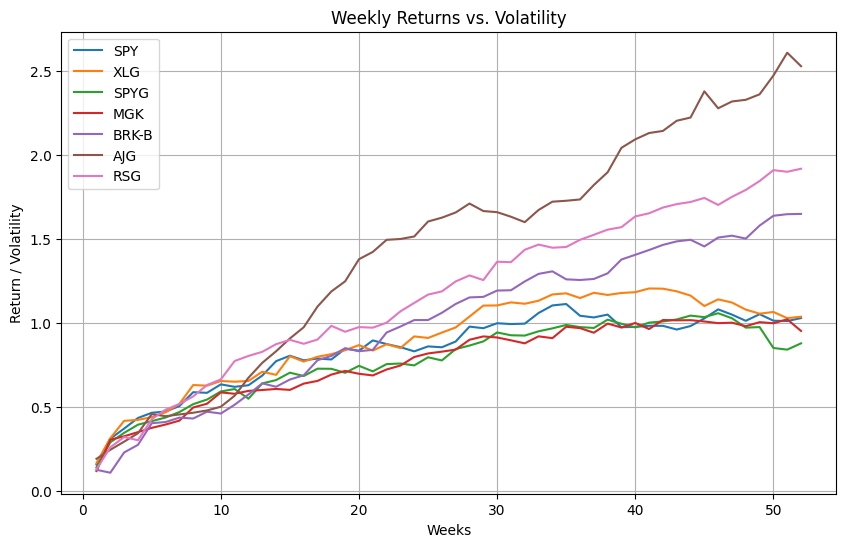

In [10]:
symbols = [
  'SPY', 'XLG', 'SPYG', 'MGK', 
  'BRK-B', 'AJG', 'RSG',
  # 'MAGS', 'FNGS', 'SPMO', 'QQQ', 
  # 'NVDA'
]
df = pd.DataFrame()
history_weeks = 261
for symbol in symbols:
    rows = [None] # 0 weeks
    history = get_stock_history(symbol, interval='1wk').tail(history_weeks)
    if len(history) < history_weeks:
      print(f"Skipping {symbol} due to insufficient history")
      continue
    for w in range(1, 53):
      changes = history.Close.pct_change(periods=w)
      change = changes.median()
      std = changes.std()
      rows.append(change / std if std != 0 else 0)
    df[symbol] = rows

df = df.drop(0)
display(df)
df.plot(figsize=(10, 6), title='Weekly Returns vs. Volatility', grid=True)
plt.xlabel('Weeks')
plt.ylabel('Return / Volatility')


In [3]:
etfs = pd.read_csv('data/top-etfs.csv')
rows = []
for symbol in etfs['Symbol'].to_list():
    history = get_stock_history(symbol, interval='1wk', cache_days=100).tail(112)
    r = []
    for w in range(1, 6):
      changes = history.Close.pct_change(periods=w)
      change = changes.clip(lower=0).mean()
      std = changes.std()
      ratio = change / std if std != 0 else 0
      r.append(ratio)
    rows.append({
        'Symbol': symbol,
        'Weeks': len(history),
        'Ratio': mean(r)
    })
df2 = pd.DataFrame(rows).sort_values(by='Ratio', ascending=False)
display(df2)

,Symbol,Weeks,Ratio
257,BOXX,112,4.515489
139,MINT,112,1.410971
268,TBIL,112,1.380924
692,XHLF,112,1.380542
64,JPST,112,1.376798
...,...,...,...
525,SH,112,0.312861
893,PSQ,112,0.305461
993,SDS,112,0.295383
951,SPXU,112,0.288082
